In [10]:
%reset -f
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib notebook

ticksize= 12
titlesize = 18
mpl.rcParams.update({'font.size':ticksize }) # legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize':titlesize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
mpl.rcParams.update({'image.cmap':'rainbow'})

mpl.rcParams.update({'axes.formatter.useoffset':False})   # no offset of axis
mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

<IPython.core.display.Javascript object>


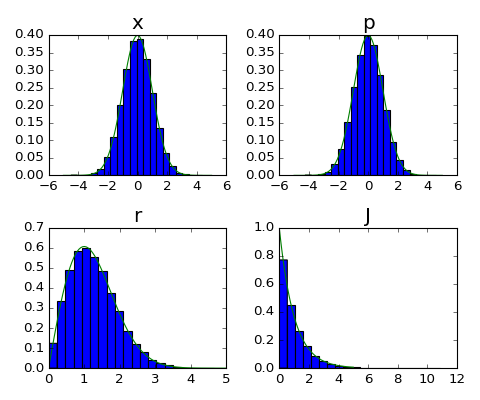

<IPython.core.display.Javascript object>


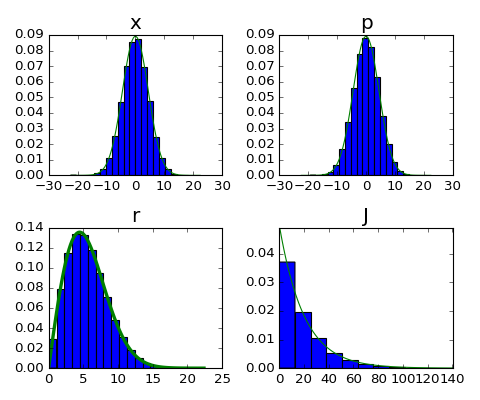

In [9]:
pi2 = 2*np.pi
bins = 20

N = int(1e5)
x = np.random.randn(N)
p = np.random.randn(N)
xax = np.linspace(-5,5,100)
xt = 1/np.sqrt(pi2)*np.exp(-0.5*xax**2)
rax = np.linspace(0,5,100)
rt = rax*np.exp(-0.5*rax**2)
plt.figure()
plt.subplot(221)
plt.hist(x,normed=True,bins=bins)
plt.plot(xax,xt)
plt.title('x')
plt.subplot(222)
plt.hist(p,normed=True,bins=bins)
plt.plot(xax,xt)
plt.title('p')

plt.subplot(223)
plt.hist(np.sqrt(x**2+p**2),normed=True,bins=bins)
plt.plot(rax,rt)
plt.title('r')
plt.subplot(224)
plt.hist(0.5*(x**2+p**2),normed=True,bins=bins)
plt.plot(rax,np.exp(-rax))
plt.title('J')
plt.tight_layout()

# After a time
D=1
t=10
sig = np.sqrt(2*D*t)
x = np.random.normal(0,sig,N)
p = np.random.normal(0,sig,N)
xmax = np.max(np.abs(x))
xax = np.linspace(-xmax,xmax,100)
xt = 1/np.sqrt(pi2*sig**2)*np.exp(-0.5*xax**2/sig**2)
rax = np.linspace(0,xmax,100)
rt = rax/sig**2*np.exp(-0.5*rax**2/sig**2)
plt.figure()
plt.subplot(221)
plt.hist(x,normed=True,bins=bins)
plt.plot(xax,xt)
plt.title('x')
plt.subplot(222)
plt.hist(p,normed=True,bins=bins)
plt.plot(xax,xt)
plt.title('p')

plt.subplot(223)
plt.hist(np.sqrt(x**2+p**2),normed=True,bins=bins)
plt.plot(rax,rt,lw=3)
plt.title('r')
plt.subplot(224)
plt.hist(0.5*(x**2+p**2),normed=True,bins=bins)
plt.plot(0.5*rax**2,1/sig**2*np.exp(-0.5*rax**2/sig**2))
plt.title('J')
plt.tight_layout()

<IPython.core.display.Javascript object>


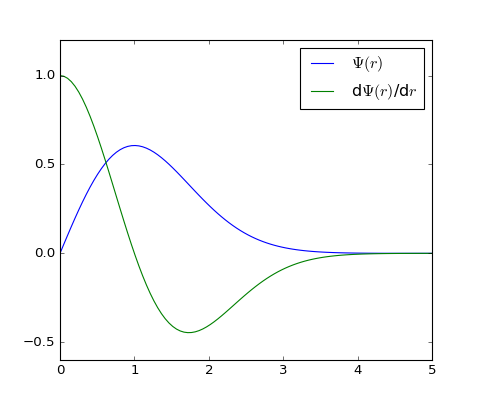

In [23]:
r = np.linspace(0,5,100)
phir = r*np.exp(-r**2/2)
dphirdr=(1-r**2)*np.exp(-r**2/2)
plt.figure()
plt.plot(r,phir,label=r'$\Psi(r)$')
plt.plot(r,dphirdr,label=r'd$\Psi(r)$/d$r$')
plt.legend(loc=0)